In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [4]:
conn = sqlite3.connect('main_normalized.db')
cur = conn.cursor()


In [27]:
sql='''
    WITH ROUTE_TABLE AS 
    (
    SELECT COUNT(RouteID)route_freq,RouteID 
    FROM flights 
    GROUP BY RouteID
    )
    SELECT route_freq,Source,Destination 
    FROM ROUTE_TABLE    
    INNER JOIN routes r ON ROUTE_TABLE.RouteID=r.RouteID
    ORDER BY -route_freq
    LIMIT 20
    '''

In [28]:
top_10_routes=pd.read_sql_query(sql,con=conn).loc[:,['Source',"Destination"]]

In [29]:
top_10_routes=tuple(top_10_routes.values)

In [17]:
def get_route(route,year):
    sql=f'''
        WITH TIME_TABLE AS 
        (
            SELECT
                CASE
                WHEN strftime('%m', FlightDate) = '01' THEN 'January'
                WHEN strftime('%m', FlightDate) = '02' THEN 'February'
                WHEN strftime('%m', FlightDate) = '03' THEN 'March'
                WHEN strftime('%m', FlightDate) = '04' THEN 'April'
                WHEN strftime('%m', FlightDate) = '05' THEN 'May'
                WHEN strftime('%m', FlightDate) = '06' THEN 'June'
                WHEN strftime('%m', FlightDate) = '07' THEN 'July'
                WHEN strftime('%m', FlightDate) = '08' THEN 'August'
                WHEN strftime('%m', FlightDate) = '09' THEN 'September'
                WHEN strftime('%m', FlightDate) = '10' THEN 'October'
                WHEN strftime('%m', FlightDate) = '11' THEN 'November'
                WHEN strftime('%m', FlightDate) = '12' THEN 'December'
            END FlightDate,
            strftime('%Y', FlightDate) AS Year,
            Source,Destination
            FROM flights F
            INNER JOIN routes r ON r.RouteID=F.RouteID
            WHERE Source='{top_10_routes[route][0]}' AND Destination='{top_10_routes[route][1]}' AND Year='{year}'
        )
        SELECT *,COUNT(*)freq FROM TIME_TABLE
        GROUP BY FlightDate
        '''
    return sql,top_10_routes[route][0],top_10_routes[route][1]

In [42]:
airports={"LAX":"Los Angeles","SFO":"San Francisco","LAS":"Las Vegas","HNL":"Honolulu","OGG":"Kahului","LGA":"Queens,NY","ORD":"Chicago",
    "JFK":"JFK,NY","SEA":"Seattle, WA","PDX":"Portland, Oregon","DEN":"Denver,Colorado","DCA":"Washington Reagan National, DC",
"BOS":"Boston Logan,Massachusetts","PHX":"Phoenix Sky Harbor,Arizona","MCO":"Orlando International Airport",
 "ATL":"Atlanta International airport","FLL":"Fort Lauderdale,Florida"}

# Frequency of flights from top 10 frequently used routes in 2022

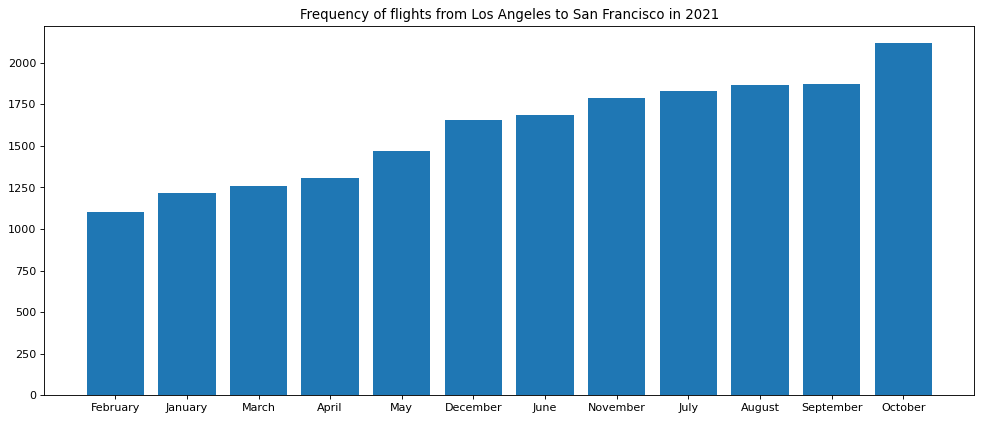

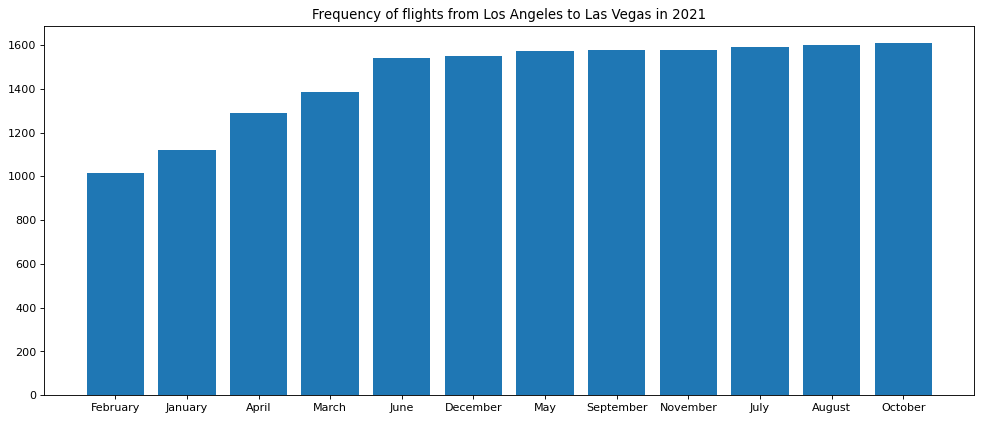

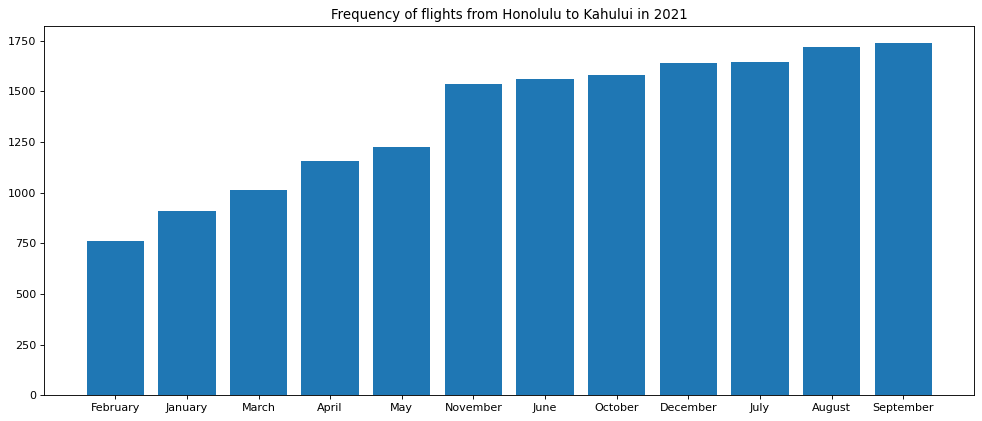

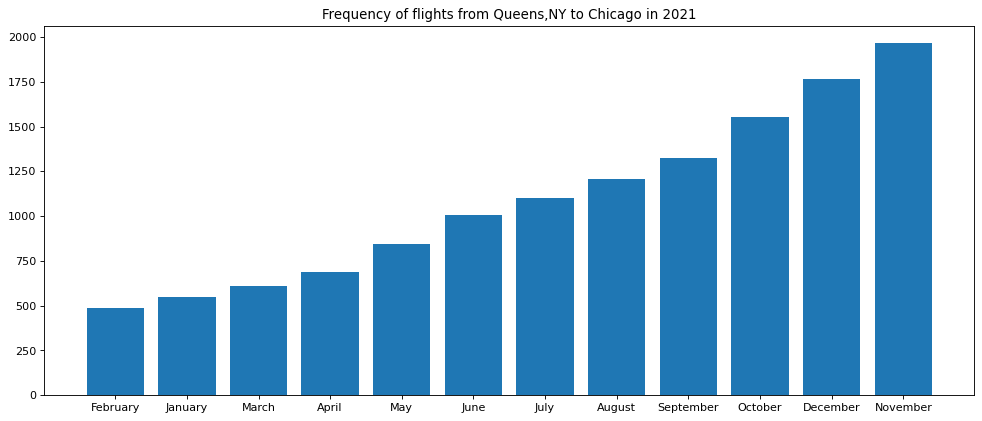

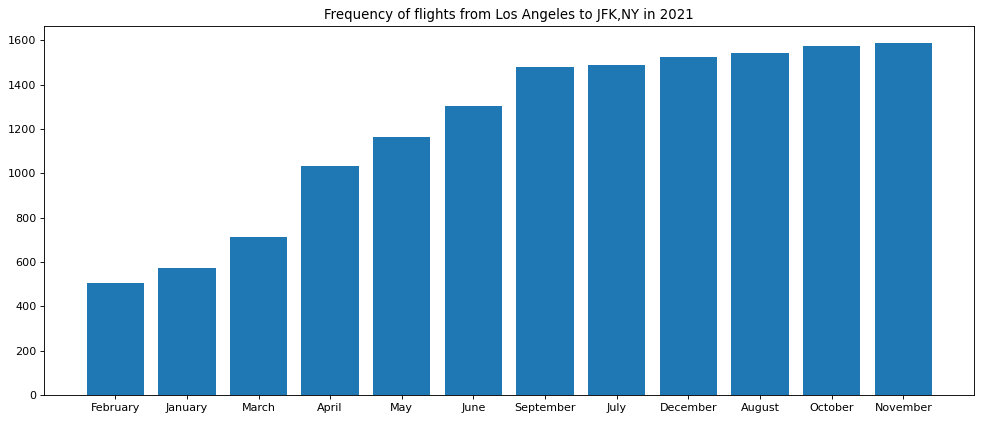

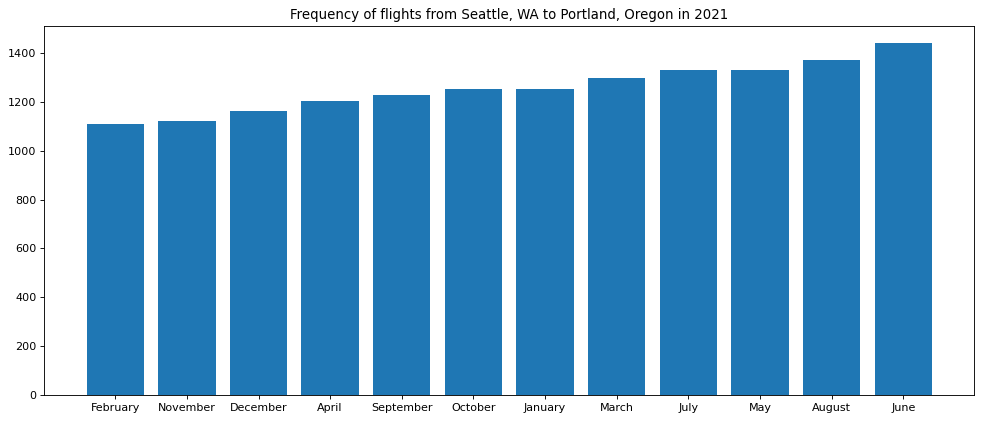

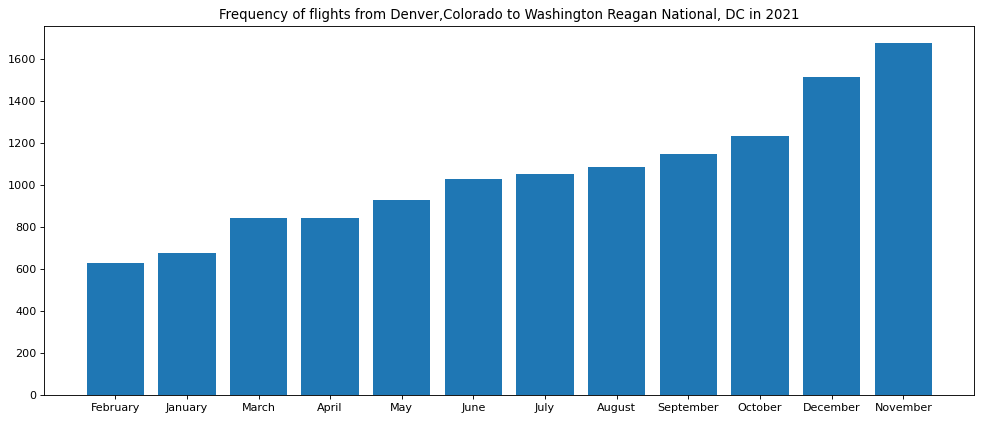

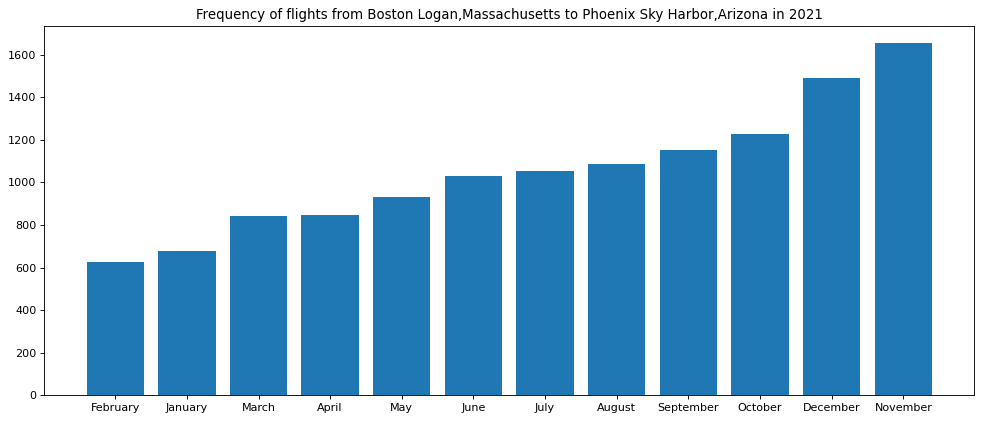

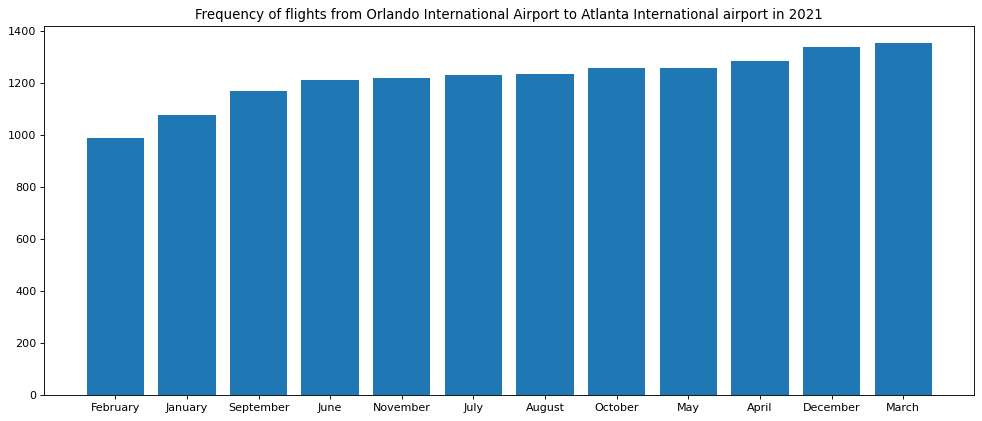

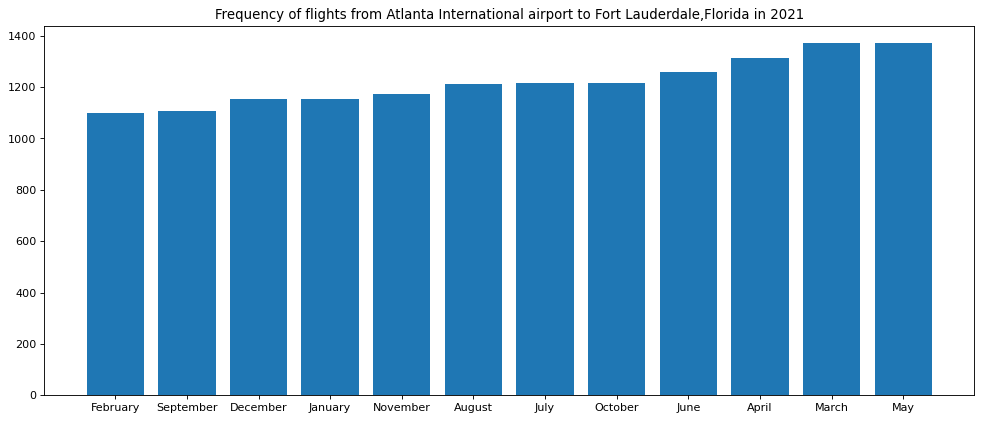

In [59]:
for i in range(20):

    if i%2==0:
        sql,source,dest=get_route(i,2021)
        route1=pd.read_sql_query(sql,con=conn)
        route1_name=route1.loc[:,"Source"].values[0]
    else:
        sql,source,dest=get_route(i,2021)
        route2=pd.read_sql_query(sql,con=conn)
        route2_name=route2.loc[:,"Source"].values[0]
        
        route_comb=pd.concat([route1,route2])
        sum_df=route_comb.groupby("FlightDate").sum("freq")
        dat=sorted(list(zip(sum_df.index,sum_df['freq'].values)),key=lambda x:x[1])
        month=list(map(lambda x:x[0],dat))
        freq=list(map(lambda x:x[1],dat))
        figure(figsize=(15, 6), dpi=80)
        
        plt.bar(month,freq)
        plt.title(f"Frequency of flights from {airports[route1_name]} to {airports[route2_name]} in 2021")
        plt.show()
        

- Frequency of flights for the first few months of 2021 for most of the considered routes are low,probably due to covid restrictions.

# Frequency of flights from top 10 frequently used routes in 2022

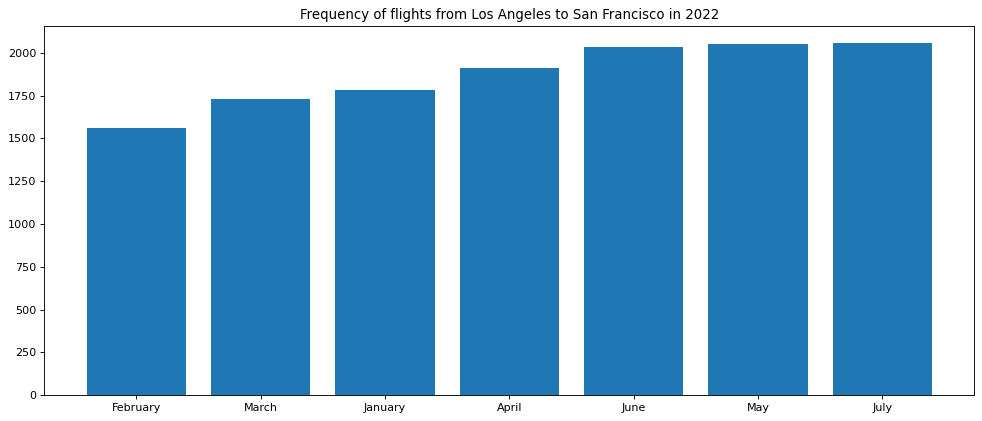

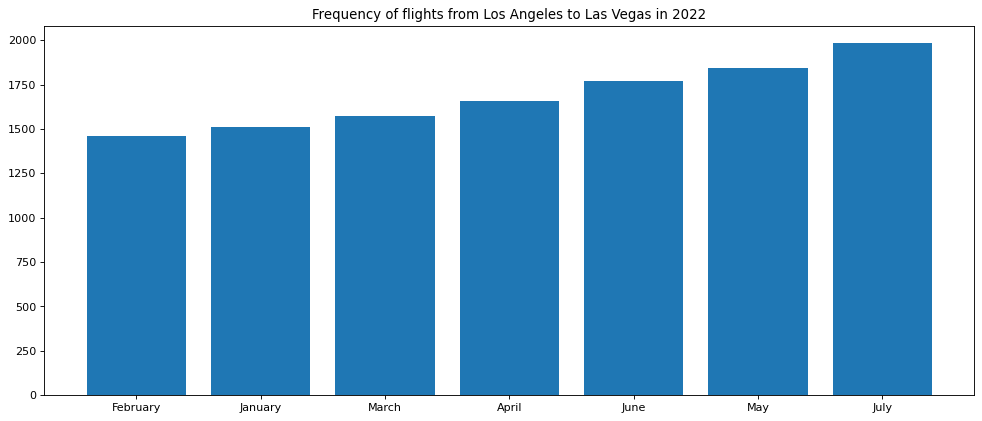

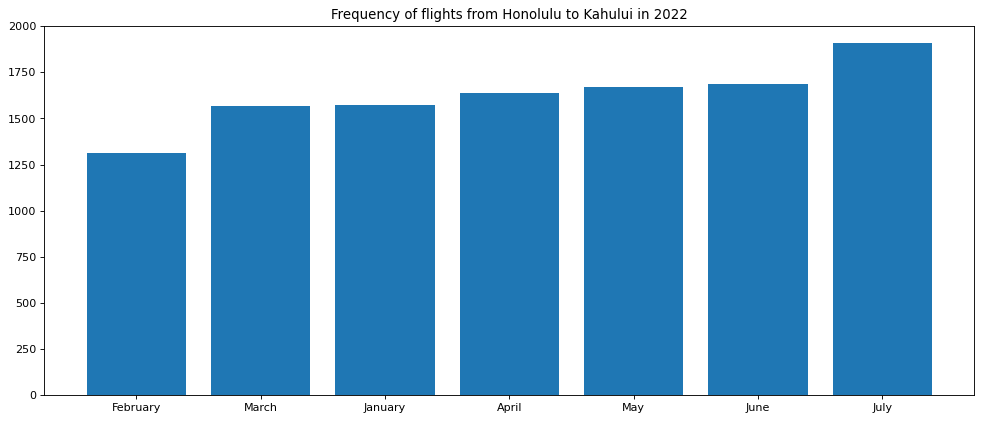

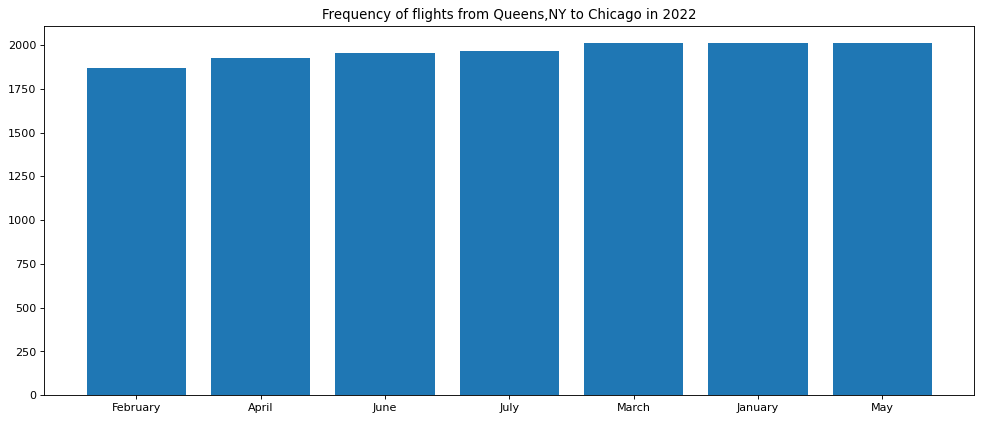

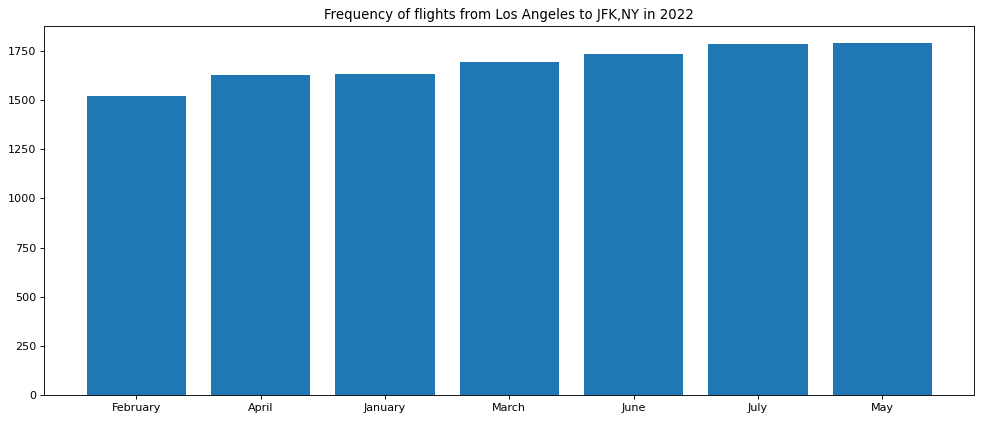

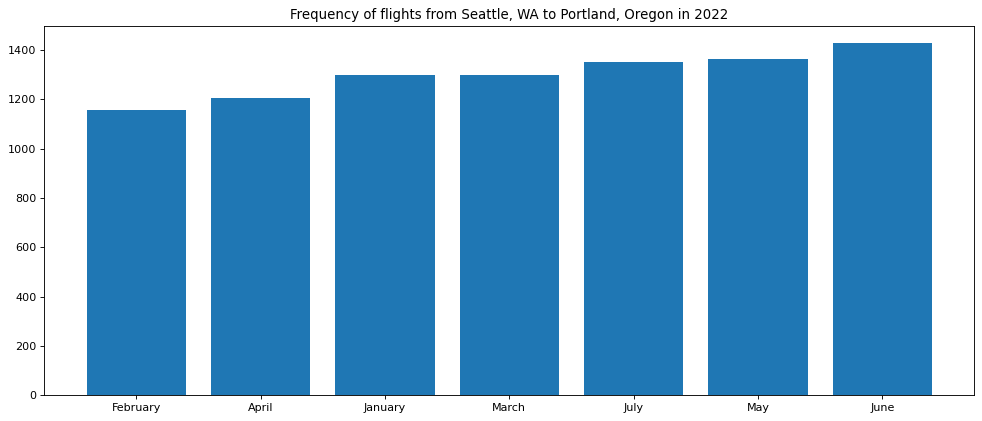

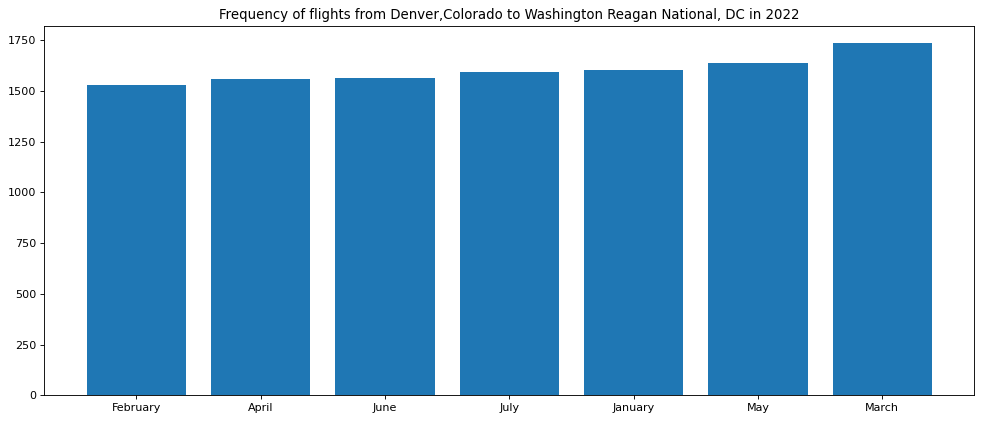

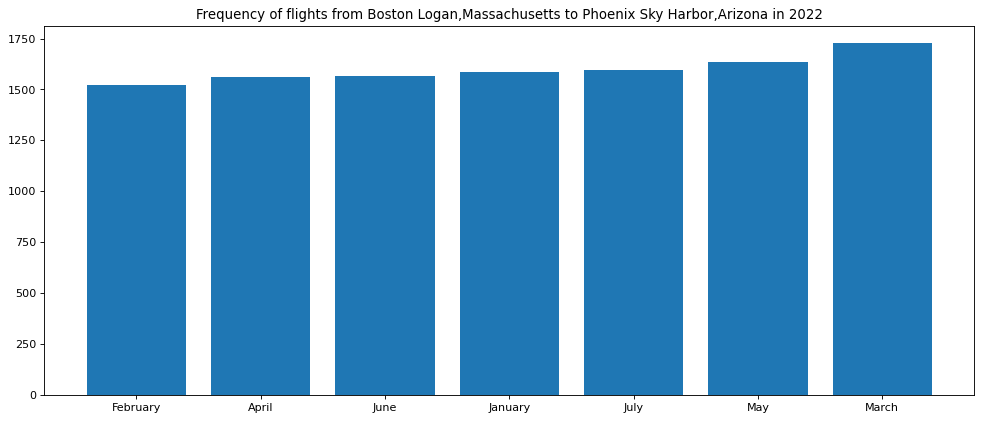

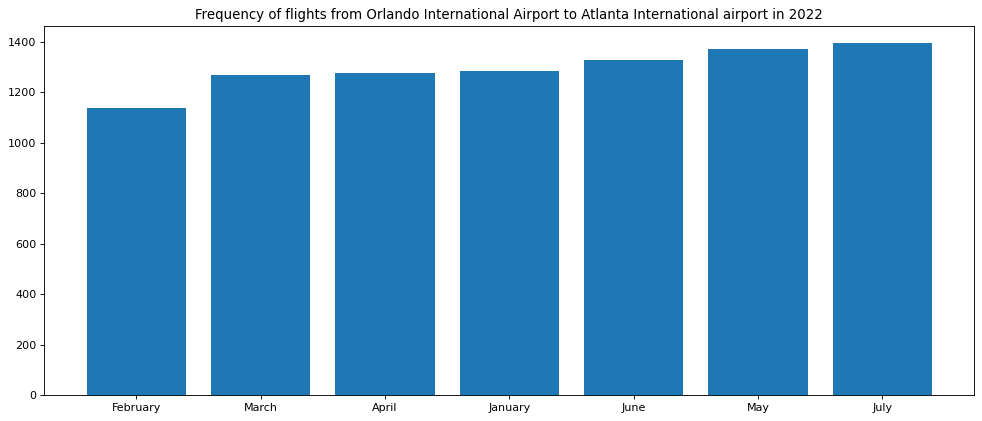

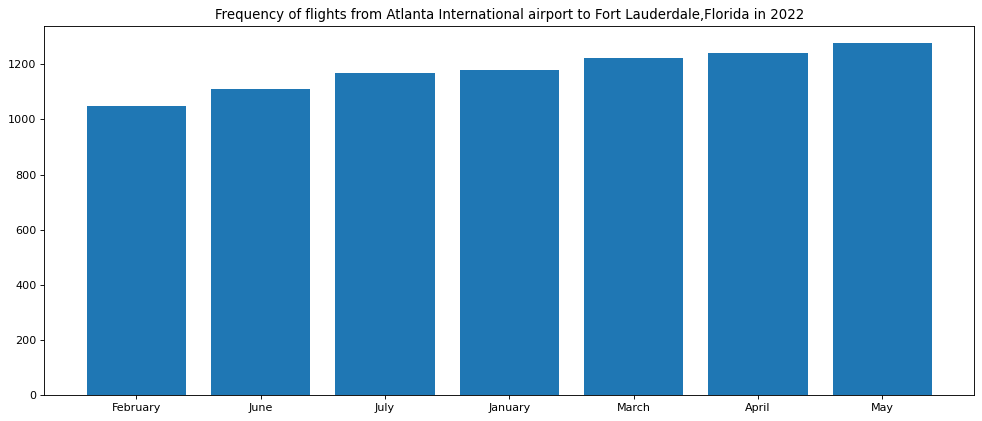

In [62]:
for i in range(20):

    if i%2==0:
        sql,source,dest=get_route(i,2022)
        route1=pd.read_sql_query(sql,con=conn)
        route1_name=route1.loc[:,"Source"].values[0]
    else:
        sql,source,dest=get_route(i,2022)
        route2=pd.read_sql_query(sql,con=conn)
        route2_name=route2.loc[:,"Source"].values[0]
        
        route_comb=pd.concat([route1,route2])
        sum_df=route_comb.groupby("FlightDate").sum("freq")
        dat=sorted(list(zip(sum_df.index,sum_df['freq'].values)),key=lambda x:x[1])
        month=list(map(lambda x:x[0],dat))
        freq=list(map(lambda x:x[1],dat))
        figure(figsize=(15, 6), dpi=80)

        plt.bar(month,freq)
        plt.title(f"Frequency of flights from {airports[route1_name]} to {airports[route2_name]} in 2022")
        plt.show()
        

- Frequency of flights in the year 2022 is almost same for all of the months, probably as the covid restrictions were lifted